In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [3]:
zip_location='../data/kagglecatsanddogs_5340.zip'
zip_ref=zipfile.ZipFile(zip_location,'r')
zip_ref.extractall('data/')
zip_ref.close()

In [4]:
dir_name=[
    "data/PetImages/training/",
    "data/PetImages/validation/",
    "data/PetImages/training/cat",
    "data/PetImages/training/dog",
    "data/PetImages/validation/cat",
    "data/PetImages/validation/dog",
]
for dir in dir_name:
    try:
        os.mkdir(dir)
        print(f"{dir} is created")
    except Exception as e:
        print("failed to create",e)

data/PetImages/training/ is created
data/PetImages/validation/ is created
data/PetImages/training/cat is created
data/PetImages/training/dog is created
data/PetImages/validation/cat is created
data/PetImages/validation/dog is created


In [5]:
len(os.listdir('data/PetImages/cat/'))

12501

In [6]:
total_pic=len(os.listdir('data/PetImages/dog/'))

In [7]:
training_size=int(total_pic*0.8)
testing_size=int(total_pic-training_size)

In [8]:
training_size,testing_size

(10000, 2501)

In [9]:
cat_list=os.listdir('data/PetImages/cat/')
cat_list[:5]

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']

In [13]:
import shutil
source='data/PetImages/cat'
destination='data/PetImages/training/cat'

count=0
for x in cat_list:
    if count>training_size:
        break
    count+=1
    sr=os.path.join(source,x)
    des=os.path.join(destination,x)
    if os.stat(sr).st_size==0:
        continue
    shutil.copyfile(sr,des)

In [2]:
len(os.listdir('data/PetImages/training/cat'))

10000

In [11]:
len(os.listdir('data/PetImages/validation/cat'))

0

In [12]:
import shutil
source='data/PetImages/cat'
destination='data/PetImages/validation/cat'

count=0
for x in cat_list:
    if count>testing_size:
        break
    count+=1
    sr=os.path.join(source,x)
    des=os.path.join(destination,x)
    if os.stat(sr).st_size==0:
        continue
    shutil.copyfile(sr,des)



In [14]:
len(os.listdir('data/PetImages/validation/cat'))

2502

In [15]:
dog_list=os.listdir('data/PetImages/dog/')
dog_list[:5]

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']

In [16]:
import shutil
source='data/PetImages/dog'
destination='data/PetImages/training/dog'

count=0
for x in dog_list:
    if count>training_size:
        break
    count+=1
    sr=os.path.join(source,x)
    des=os.path.join(destination,x)
    if os.stat(sr).st_size==0:
        continue
    shutil.copyfile(sr,des)

In [17]:
len(os.listdir('data/PetImages/training/dog'))

10000

In [18]:
import shutil
source='data/PetImages/dog'
destination='data/PetImages/validation/dog'

count=0
for x in dog_list:
    if count>testing_size:
        break
    count+=1
    sr=os.path.join(source,x)
    des=os.path.join(destination,x)
    if os.stat(sr).st_size==0:
        continue
    shutil.copyfile(sr,des)

In [19]:
len(os.listdir('data/PetImages/validation/dog'))

2501

In [20]:
print(len(os.listdir('data/PetImages/training/dog')))
print(len(os.listdir('data/PetImages/validation/dog')))
print(len(os.listdir('data/PetImages/training/cat')))
print(len(os.listdir('data/PetImages/validation/cat')))

10000
2501
10000
2502


In [21]:
os.listdir('data/PetImages/validation/cat')[:3]

['0.jpg', '1.jpg', '10.jpg']

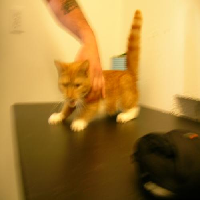

In [24]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
load_img('data/PetImages/validation/cat/0.jpg',target_size=(200,200))

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = ImageDataGenerator(rescale = 1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    'data/PetImages/training',
    target_size = (200,200),
    batch_size = 10,
    class_mode = 'binary'  #category  #multiple
)

Found 20000 images belonging to 2 classes.


In [27]:
valid_generator = train_datagen.flow_from_directory(
    'data/PetImages/validation',
    target_size = (200,200),
    batch_size = 10,
    class_mode = 'binary'
)

Found 5003 images belonging to 2 classes.


In [32]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

F:\anaconda3\envs\aiproject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer = "rmsprop",metrics=["accuracy"])

In [35]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 10
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.4401 - loss: 0.7086 - val_accuracy: 0.5400 - val_loss: 0.6914
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.4436 - loss: 0.7033 - val_accuracy: 0.5100 - val_loss: 0.6927
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4973 - loss: 0.6931 - val_accuracy: 0.4600 - val_loss: 0.6954
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5741 - loss: 0.6969 - val_accuracy: 0.4300 - val_loss: 0.6948
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4816 - loss: 0.6946 - val_accuracy: 0.4200 - val_loss: 0.6946
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5076 - loss: 0.6954 - val_accuracy: 0.5200 - val_loss: 0.6930
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4693 - loss: 0.6972 - val_accuracy: 0.6000 - val_loss: 0.6857
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.4756 - loss: 0.7071 - val_accuracy: 0.4800 - val_loss:

In [36]:
model.save('animal_model.h5')

In [46]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = tf.keras.models.load_model('animal_model.h5')
def predict_image(image_path):
    img = load_img(image_path, target_size=(200, 200))  
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    prediction = model.predict(img_array)[0][0]
    print("Prediction ",prediction)
    if prediction>0.5:
        predicted_class='dog'
    else:
        predicted_class='cat'
    # class_names = train_generator.class_indices 
    # class_names = {v: k for k, v in class_names.items()}  
    # predicted_class = class_names[np.argmax(prediction)]

    print(f"Predicted class: {predicted_class}")
    return predicted_class

image_path = 'data/PetImages/validation/dog/10.jpg'
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction  0.49845472
Predicted class: cat


'cat'

In [51]:
image_path = 'data/PetImages/training/dog/50.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediction  0.4984733
Predicted class: cat


'cat'